# ggplot2

[ggplot2](http://ggplot2.tidyverse.org/reference/) é um sistema para criar gráficos de forma declarativa, baseado em [grámaticas de gráficos](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl?ie=UTF8&qid=1477928463&sr=8-1&keywords=the+grammar+of+graphics&linkCode=sl1&tag=ggplot2-20&linkId=f0130e557161b83fbe97ba0e9175c431). Você provê o dado, dizendo ao ggplot2 como mapeá-los a elementos estéticos, quais primitivas gráficas utilizar, e ele cuida dos detalhes técnicos.

## O que é gramática de gráficos?

A ideia básica é: independemente especificar *building blocks* do plot e combiná-los para criar qualquer tipo de gráfico. Os building blocks são:

- dados
- mapa estético
- objeto geométrico
- transformação estatística
- escalas
- sistemas de cooredenadas
- ajustes de posição
- faceting

In [3]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/home/raphael/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpiD5B0X/downloaded_packages’


In [4]:
set.seed(10)

X = abs(rnorm(100, 60, 500))
X[X <= 40] = 40
w = 2000
y = X * (w - rnorm(length(X), 0, 500)) + 60000

df = data.frame(area = X, preco = y)

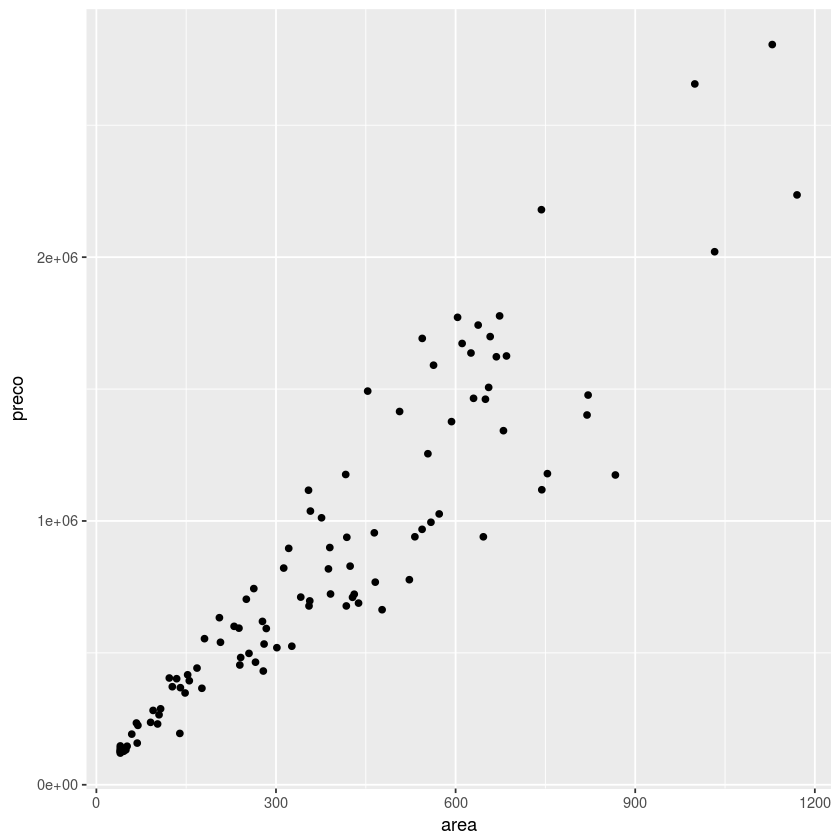

In [5]:
ggplot(df, aes(x = area, y = preco)) + 
    geom_point()

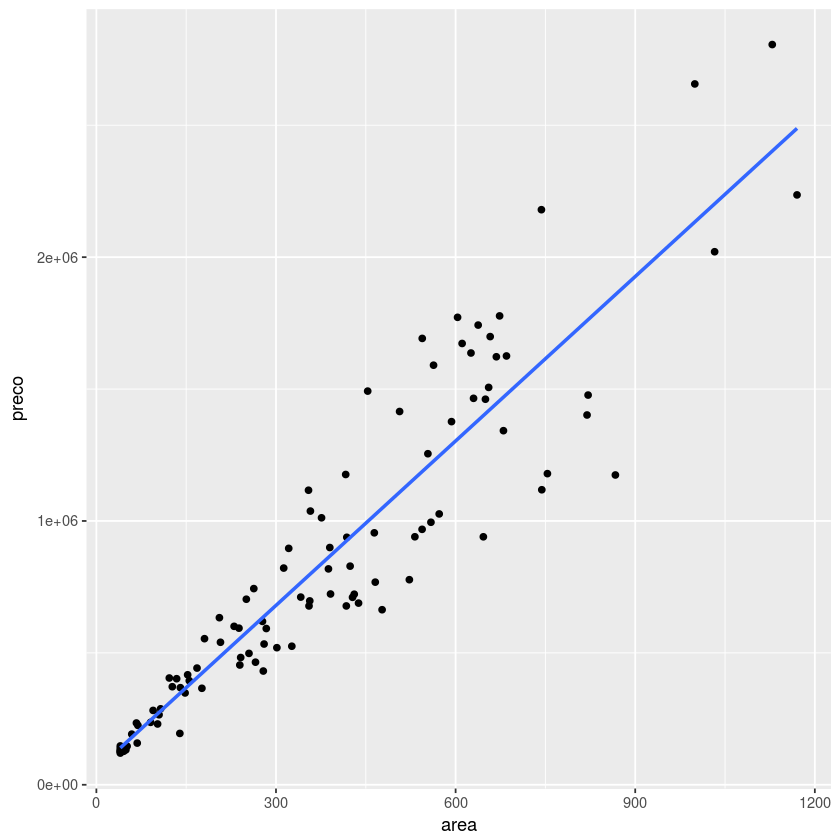

In [6]:
ggplot(df, aes(x = area, y = preco)) + 
    geom_point()  + 
    geom_smooth(method='lm', se = FALSE)

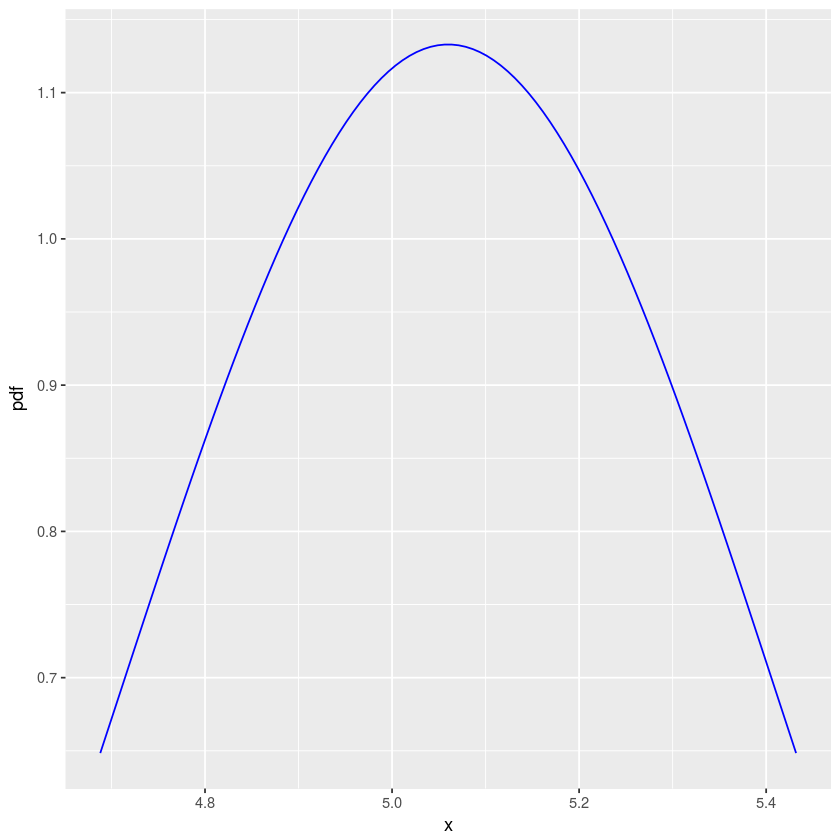

In [7]:
mu = 5.06
varianca = 0.124
sigma = sqrt(varianca)
x = seq(mu - 3*varianca, mu + 3*varianca, length.out=100)

# plotando uma distribuição normal
df = data.frame(pdf=dnorm(x, mu, sigma), x=x)

ggplot(df, aes(x = x, y = pdf)) +
    geom_line(color="blue") 

## Objetos Geométricos e Mapas Estéticos

### Mapa Estétisco

No ggplot estéticos (a.k.a. aesthetic) significa tudo que você pode ver. Por exemplo:

- posição (i.e., nos eixos x e y)
- cor (color) 
- preenchimento (fill)
- formato dos pontos (shape)
- tipo da linha (linetype)
- tamanho (size)

In [8]:
iris = read.csv("../aula_02/dados/iris-dataset.csv")

colnames(iris) = c("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

head(iris)

sepal_length,sepal_width,petal_length,petal_width,species
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa


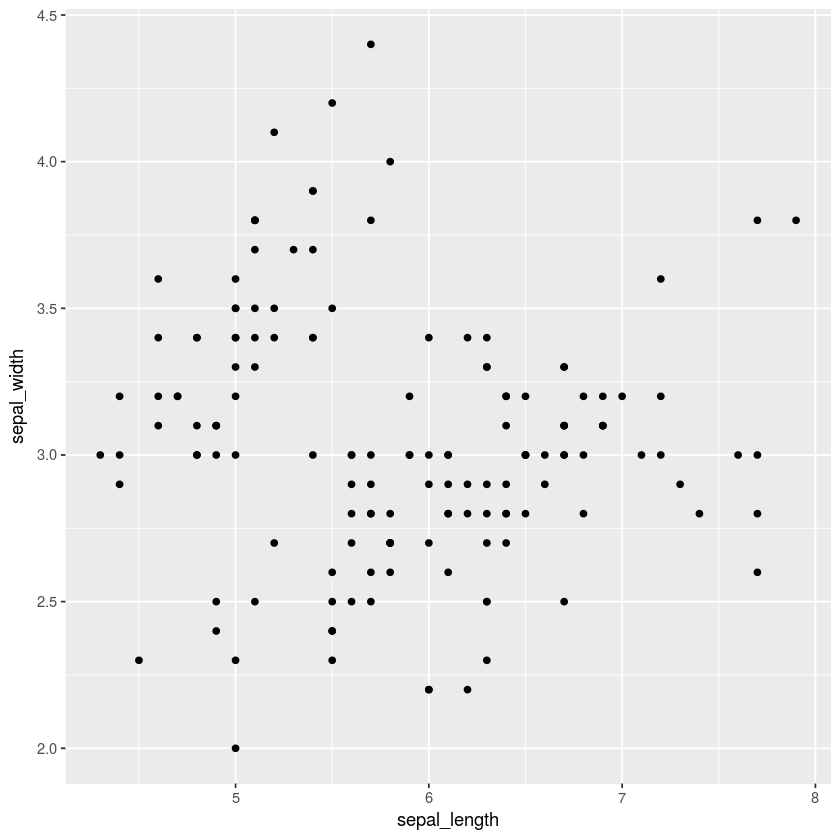

In [9]:
ggplot(iris, aes(x = sepal_length, y =sepal_width)) +
 geom_point()

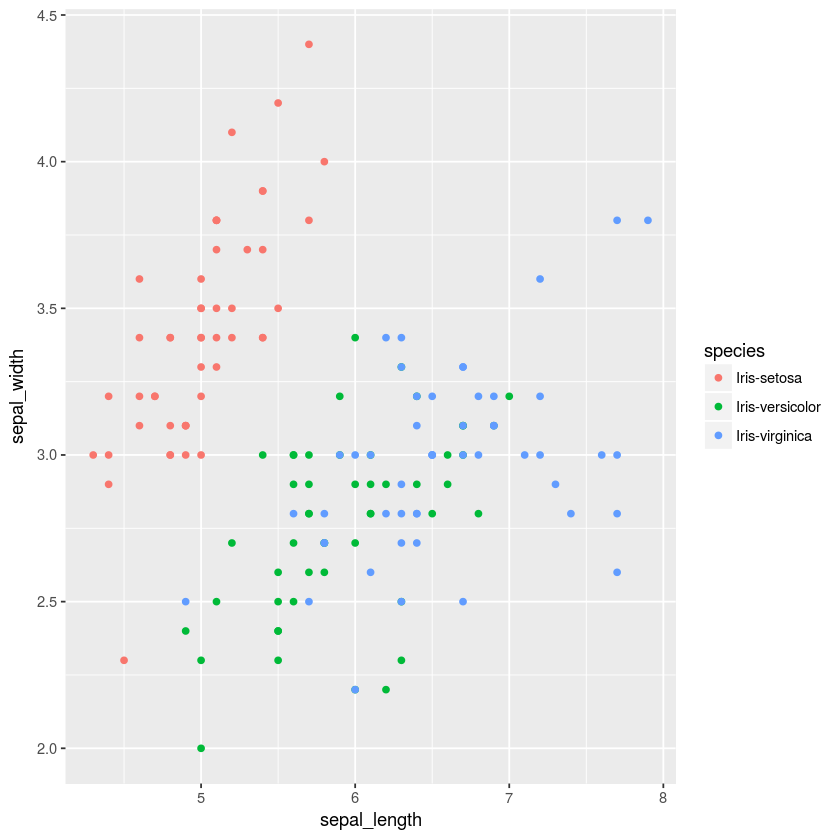

In [10]:
# adcione os seguintes aesthetic: size=petal_width, shape=species
ggplot(iris, aes(x = sepal_length, y = sepal_width, color=species)) +
 geom_point()

## Objectos Geométricos (geom)

Objetos geométricos são o que é de fato traçado. Exemplos são:

- pontos (geom_point, para gráficos de dispersão)
- linhas (geom_line, para time series, tendências, etc)
- boxplot (geom_boxplot)

Um gráfico deve ter pelo menos um geom; não quantidade máxima. Você pode adicionar geom ao seu gráfico com operador **+** .

Você pode listar os objetos geométricos disponíveis abaixo:

In [11]:
help.search("geom_", package = "ggplot2")

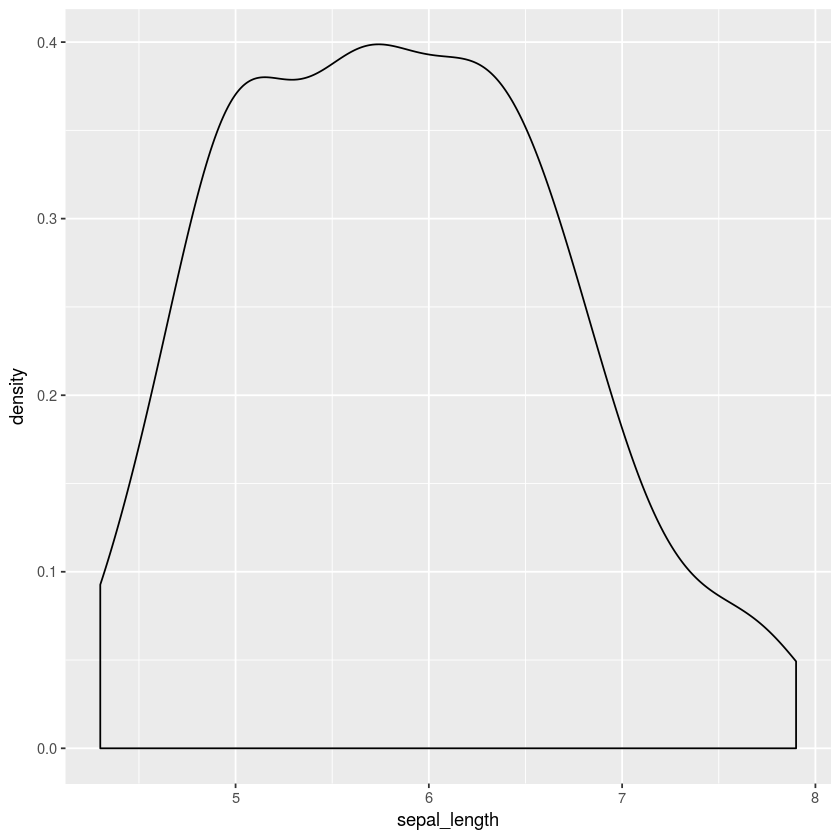

In [12]:
ggplot(iris, aes(x=sepal_length)) + 
geom_density()

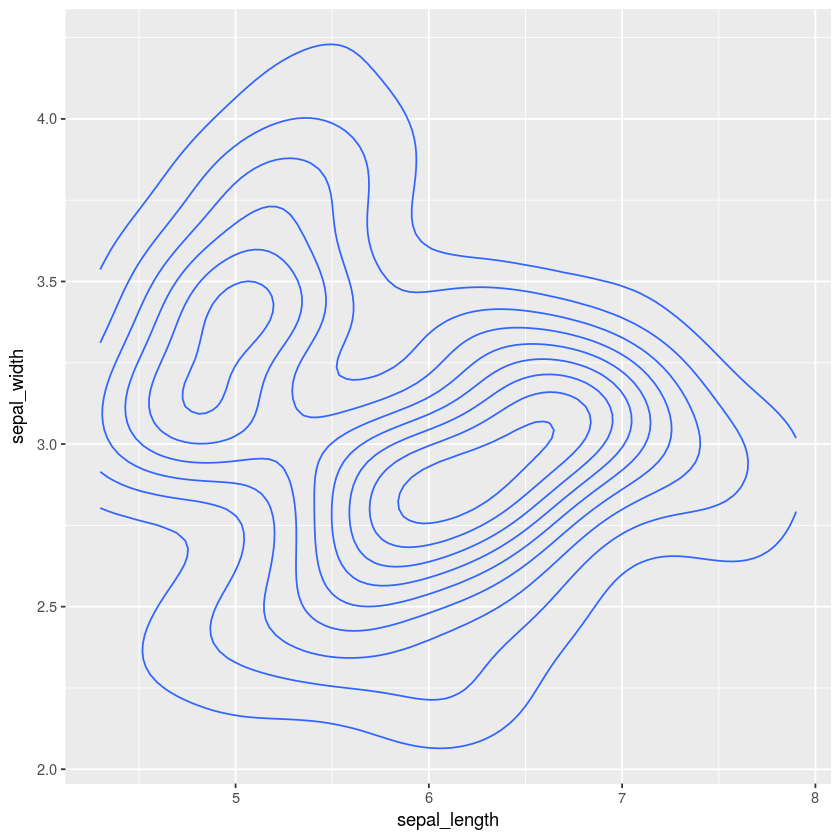

In [13]:
ggplot(iris, aes(x=sepal_length, y = sepal_width)) + 
geom_density_2d()

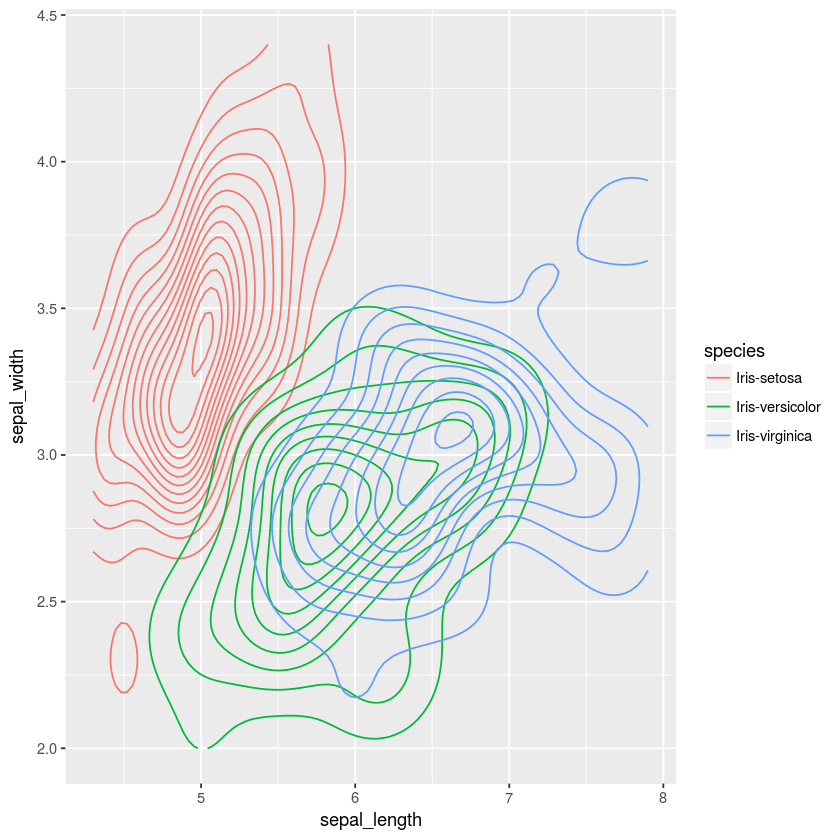

In [14]:
ggplot(iris, aes(x=sepal_length, y = sepal_width, color=species)) + 
geom_density_2d()

## Boxplot

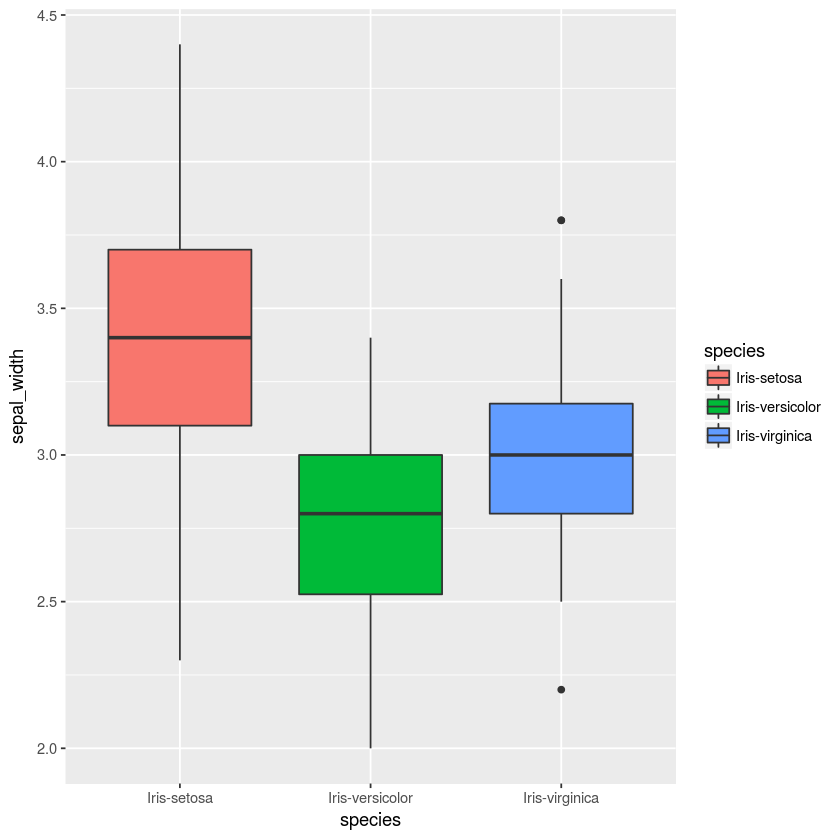

In [15]:
ggplot(iris, aes(x=species, y=sepal_width, fill=species)) + 
geom_boxplot()

## Violin

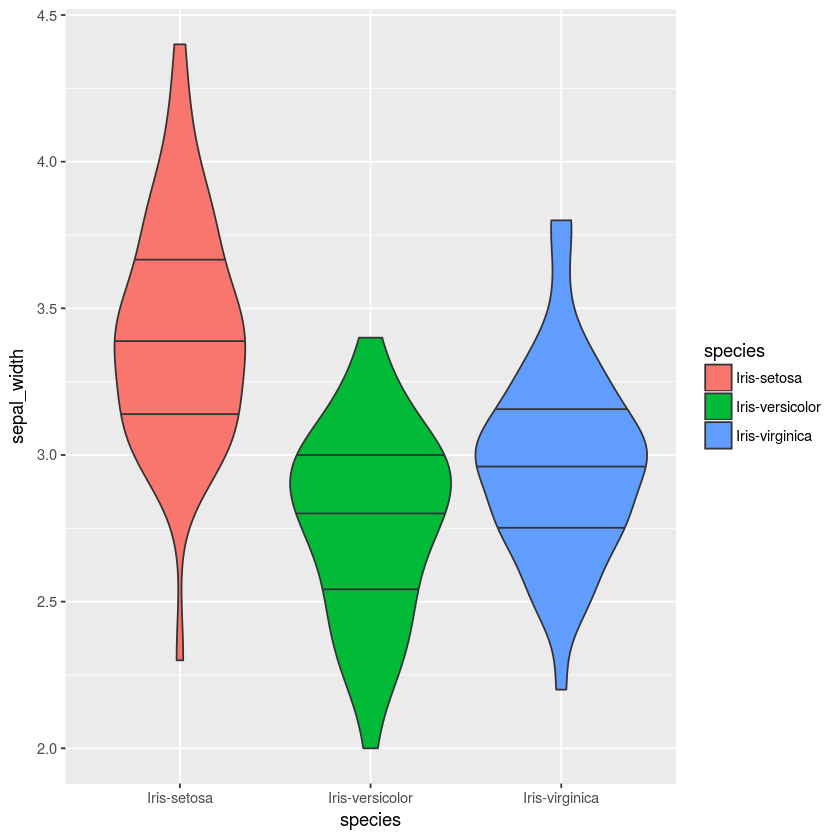

In [16]:
ggplot(iris, aes(x=species, y=sepal_width, fill=species)) + 
geom_violin(draw_quantiles=c(0.25, 0.5, 0.75))

## Faceting

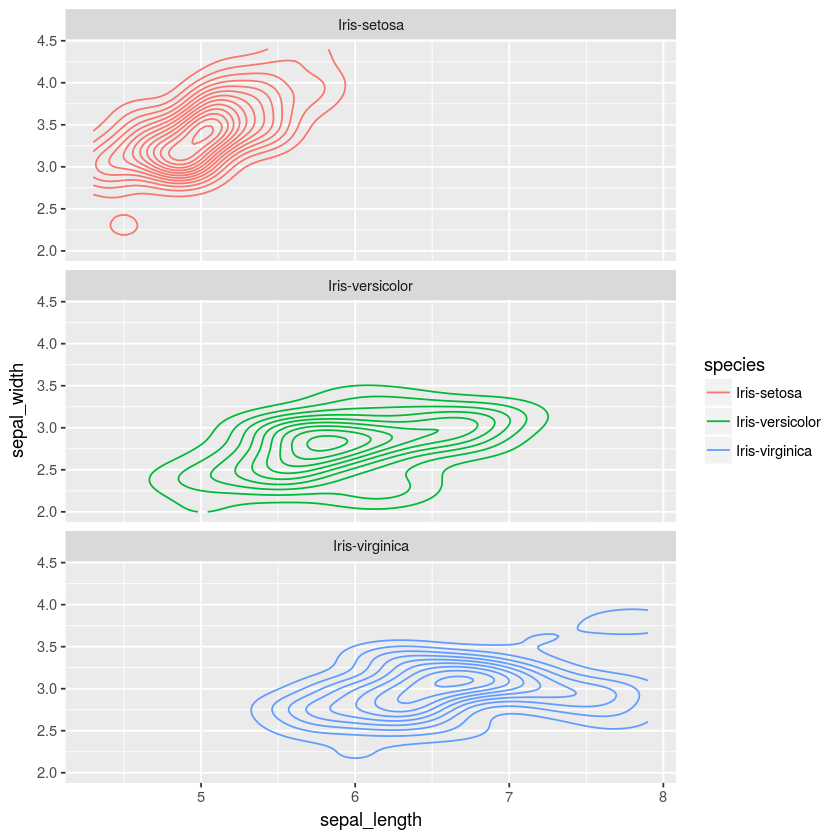

In [41]:
p <- ggplot(iris, aes(sepal_length, sepal_width, color=species)) + geom_density_2d()

p + facet_wrap(~ species, ncol=1)

## PairGrid

In [18]:
# install.packages("GGally")
library("GGally")

Warning message:
“replacing previous import by ‘utils::capture.output’ when loading ‘GGally’”Warning message:
“replacing previous import by ‘utils::head’ when loading ‘GGally’”Warning message:
“replacing previous import by ‘utils::installed.packages’ when loading ‘GGally’”Warning message:
“replacing previous import by ‘utils::str’ when loading ‘GGally’”

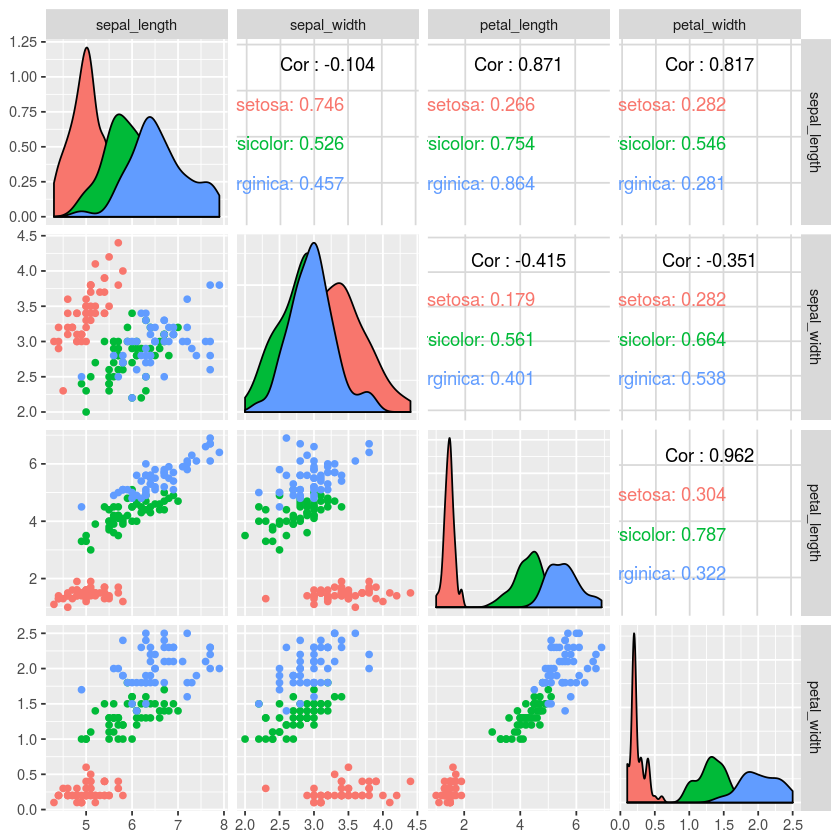

In [19]:
ggpairs(data=iris, columns=1:4, mapping=aes(color=species))

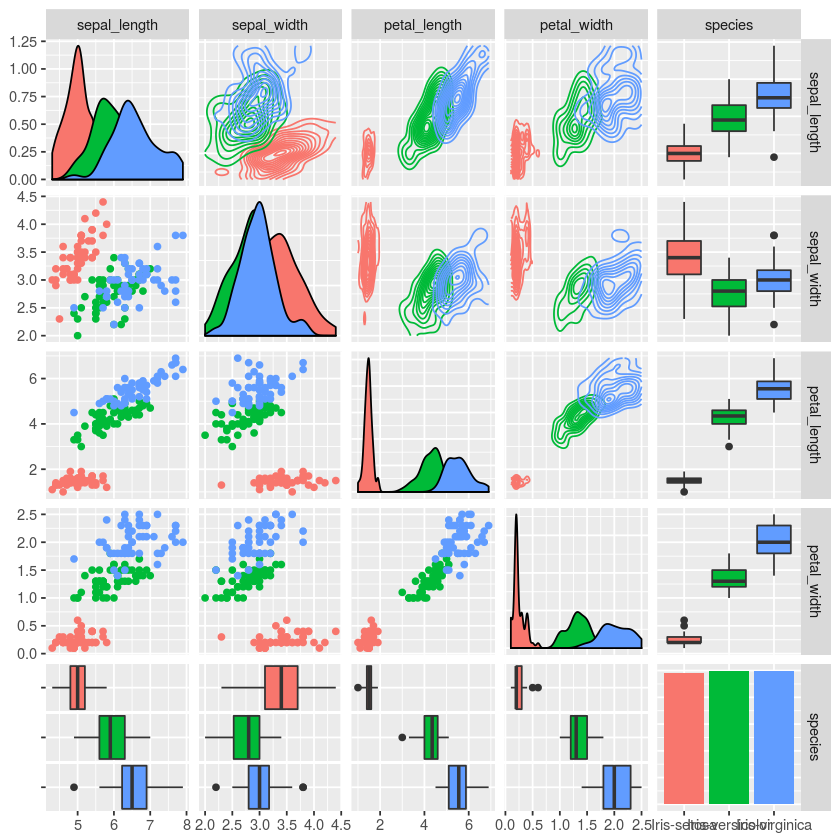

In [20]:
ggpairs(data=iris, columns=1:5, mapping=aes(color=species),
       upper=list(continuous = "density"),
       lower=list(combo = "box"))

## Exercício

Quero que você faça uma análise da tragédia do Titanic, verifique quais são as características mais importantes para a morte de um indivíduo nessa tragédia. Para isso, você vai utilizar os dados que estão no arquivo **titanic.csv** na pasta **dados**. Esses dados foram retirados da plataforma Kaggle, para maiores informações sobre as colunas e seus valores acessar [aqui](https://www.kaggle.com/c/titanic/data).